# Chapter 8 - Ex1: Hacide
- Cho 2 tập tin là hacide_train.csv và hacide_test.csv. Dữ liệu này được dùng để xây dựng model dự đoán và kiểm tra một mẫu là hiếm hay phổ biến.
- Đọc dữ liệu hacide_train.csv, xem xét tính cân bằng giữa hai loại mẫu hiếm và phổ biến. Trực quan hóa. Nhận xét.
- Nếu 2 loại mẫu này không cân bằng, hãy chọn một phương pháp cân bằng dữ liệu và thực hiện. Giải thích lý do. Trực quan hóa kết quả.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("input_data/hacide_train.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   cls         1000 non-null   int64  
 2   x1          1000 non-null   float64
 3   x2          1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [4]:
# Đếm theo loại: hiếm, phổ biến
occ = train_data.cls.value_counts()
occ

0    980
1     20
Name: cls, dtype: int64

<BarContainer object of 2 artists>

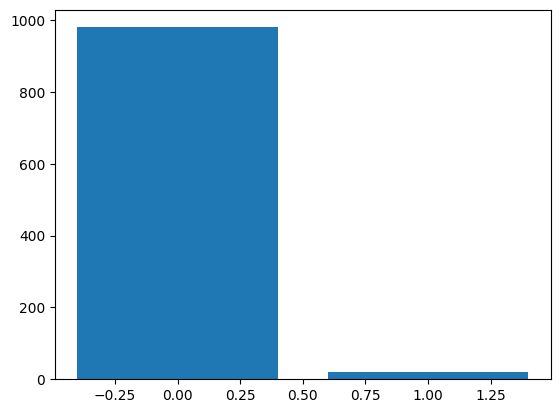

In [5]:
plt.bar(occ.index.values, occ.values)

In [6]:
# Print the ratio of fraud cases
print(occ / len(train_data.index))

0    0.98
1    0.02
Name: cls, dtype: float64


- Vì lượng dữ liệu class 1 rất ít => do đó ta sẽ áp dụng Oversampling để nâng số mẫu của nhóm hiếm bằng với nhóm phổ biến

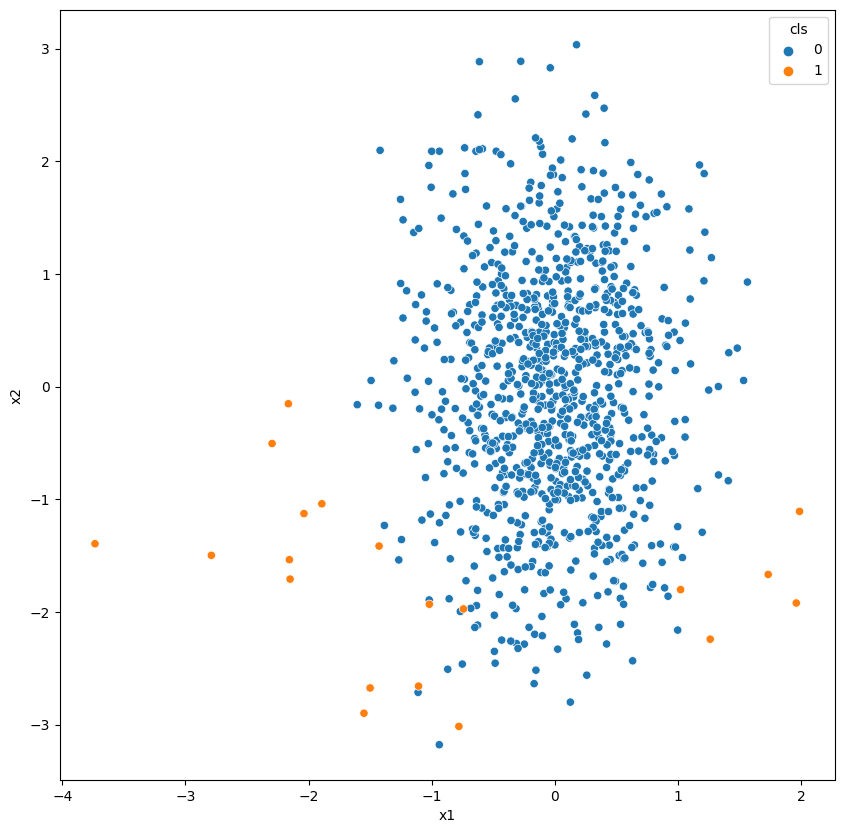

In [7]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=train_data, x="x1", y="x2", hue="cls")
plt.show()

In [8]:
# chia ra 2 tập: X (input), y (output)
X = train_data[["x1", "x2"]]
X.head()

,x1,x2
0,0.200798,0.678038
1,0.016620,1.576558
2,0.228725,-0.559534
3,0.126379,-0.093814
4,0.600821,-0.298395


In [9]:
y = train_data["cls"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cls, dtype: int64

In [10]:
# Oversampling
from imblearn.over_sampling import SMOTE

In [11]:
X_S, y_S = SMOTE().fit_resample(X, y)

In [12]:
from collections import Counter
sorted(Counter(y_S).items())

[(0, 980), (1, 980)]

In [13]:
data_S= pd.DataFrame(X_S)
data_S.columns = ["x1", "x2"]
data_S['cls'] = y_S
data_S.head()

,x1,x2,cls
0,0.200798,0.678038,0
1,0.016620,1.576558,0
2,0.228725,-0.559534,0
3,0.126379,-0.093814,0
4,0.600821,-0.298395,0


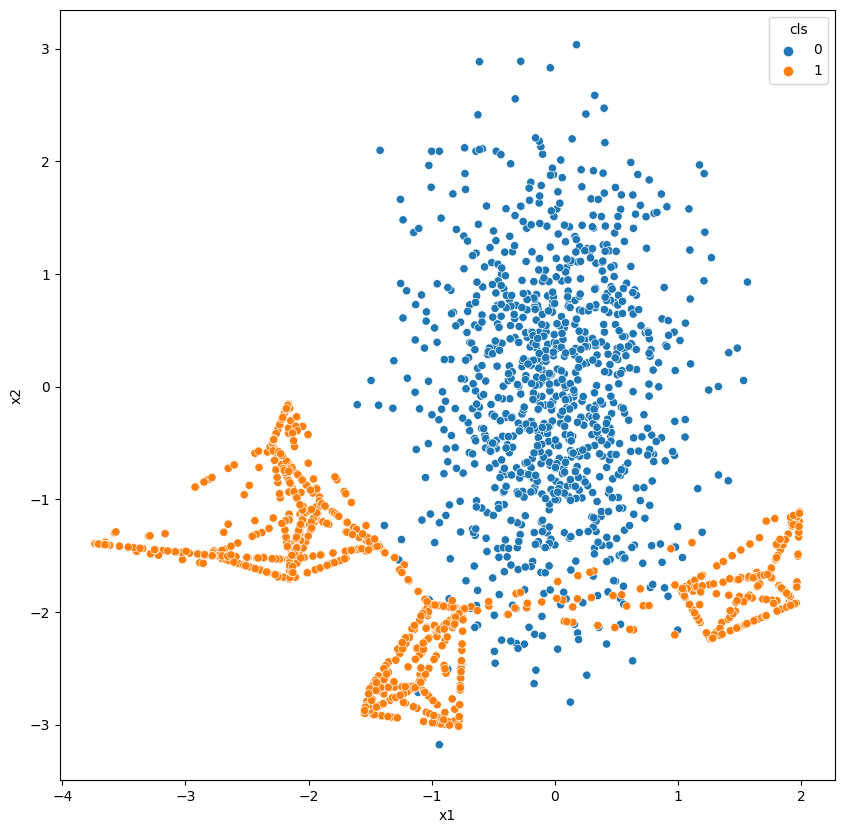

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_S, x="x1", y="x2", hue="cls")
plt.show()